<a href="https://colab.research.google.com/github/ddutta111/Fraud-Detection-Model-Python/blob/main/Fraud_Detection_Model_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Business Problem**

It is important that banks or credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Our business goal is to accurately detect fraudulent credit card transactions in real-time to prevent customers from being wrongly charged for unauthorized purchases, thereby minimizing financial losses and protecting customer trust.

## **Dataset Description**

Collection: The creditcard dataset of banks has been collected from the Kaggle Website for the Fraud Detection model analysis.

Model Features:

V1, V2, … V28: Principal components derived from PCA transformation of the original features (confidential).

Time: Seconds elapsed between each transaction and the first transaction.

Amount: Transaction amount, potentially useful for cost-sensitive learning.

Class: Response variable (1 for fraud, 0 for non-fraud) - Dependnet Variable

Note: The dataset contains anonymized numerical features due to confidentiality, with the majority of features being the result of a PCA transformation.

## **A structured outline for the fraud detection project:**

Project Steps for Fraud Detection:

- **Import Necessary Libraries:** Import libraries such as pandas, numpy, scikit-learn, matplotlib, seaborn, and imbalanced-learn to facilitate data manipulation, visualization, and modeling.
Exploratory Data Analysis (EDA) and Data Preprocessing.

- **EDA:** Checking the data Summary, class distribution, detect anomalies, correlation matrix

- **Data Preprocessing:** Handle missing values through imputation or removal.
Address class imbalance using techniques such as oversampling, undersampling, or SMOTE, Standarization, splitting dataset into train and test set etc.

- **Model Selection and Evaluation**:

**1. Logistic Regression (LR):** Chosen for its simplicity, interpretability, and efficiency in binary classification.

**2. Random Forest Classifier:** Selected for its robustness, ability to handle non-linear relationships, and effectiveness in managing complex datasets.

- **K-Fold Cross-Validation:** We conduct a K-Fold Cross Validation prior to training the LR model to ensure that the model's performance is reliably assessed across different subsets of the data, helping to mitigate overfitting and providing a more accurate estimate of its generalization ability.

- **Feature Importance Analysis and Comparison**: Extract and compare feature importance from both models to understand the key drivers of fraud detection.

- Visualize the results by AUC Curve, Confusion Matrix Heatmap, bar charts to highlight the differences in each model's performance and how each model weighs the features.

## **Decision on Model Selection**

**1. Logistic Regression:**

- This model offers interpretability, allowing for straightforward communication of results.

- Efficient with smaller datasets and performs well when the relationship between features is approximately linear.

**2. Random Forest Classifier:**

- This model provides a more flexible approach to capturing complex interactions among features.

- Reduces the risk of overfitting through ensemble learning, making it suitable for larger and more intricate datasets.

This structured approach will help guide the project and clarify the rationale behind the model choices.

# Importing Libraries

In [ ]:
# Data Manipulation Libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization Libraries
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns           # For enhanced data visualization

# Machine Learning Libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler       # For feature scaling to standardize the dataset
from sklearn.ensemble import RandomForestClassifier     # For implementing the Random Forest Classifier
from sklearn.model_selection import cross_val_score, KFold  # For cross-validation and model evaluation
from sklearn.linear_model import LogisticRegression     # For implementing the Logistic Regression model
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve,
                             precision_score, recall_score,
                             accuracy_score)  # For model evaluation metrics

# Handling Imbalanced Datasets
from imblearn.over_sampling import SMOTE  # For oversampling minority class to handle class imbalance

# Data Cleaning and Imputation
from sklearn.impute import SimpleImputer  # For handling missing values in the dataset

# Importing the Dataset

In [ ]:
# Step 2: Load the dataset
dataset = pd.read_csv('creditcard.csv')

<ipython-input-2-143b1f4deaa3>:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('creditcard.csv')


## Exploratory Data Analysis

Data Types, Summery Statistics and Class Distribution

In [ ]:
# Step 3: Initial Data Exploration
print(dataset.info())  # Check data types and null values
print(dataset.describe())  # Summary statistics
print(dataset['Class'].value_counts())  # Check imbalance in the target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33760 entries, 0 to 33759
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    33760 non-null  int64  
 1   V1      33760 non-null  float64
 2   V2      33760 non-null  float64
 3   V3      33760 non-null  float64
 4   V4      33760 non-null  float64
 5   V5      33760 non-null  float64
 6   V6      33760 non-null  float64
 7   V7      33760 non-null  float64
 8   V8      33760 non-null  float64
 9   V9      33760 non-null  float64
 10  V10     33760 non-null  float64
 11  V11     33760 non-null  float64
 12  V12     33760 non-null  float64
 13  V13     33760 non-null  float64
 14  V14     33760 non-null  float64
 15  V15     33760 non-null  float64
 16  V16     33760 non-null  float64
 17  V17     33760 non-null  float64
 18  V18     33760 non-null  float64
 19  V19     33760 non-null  float64
 20  V20     33760 non-null  float64
 21  V21     33760 non-null  float64
 22

**The summery of the dataset reveals:**

- Class Distribution: The dataset is highly imbalanced with only 150 fraud cases (Class = 1) out of 51,590 total transactions.

- Feature Ranges: Features (V1 to V28) vary widely, with some having extreme values. Most features have been scaled or transformed.

- Amount: The average transaction amount is $94, with a large range, indicating significant variability in transaction sizes.

**For fraud detection, the focus should be on handling the class imbalance and understanding the feature distributions to build a robust model.**

# Data Pre-processing

# Imputation of Missing values

We replace hyphens ('-') with NaN and imputes missing values using the median to handle incomplete data

In [ ]:
# Convert hyphens to NaN
dataset.replace('-', np.nan, inplace=True)

# Now impute the missing values with median
imputer = SimpleImputer(strategy='median')
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

# Co-relation matrix

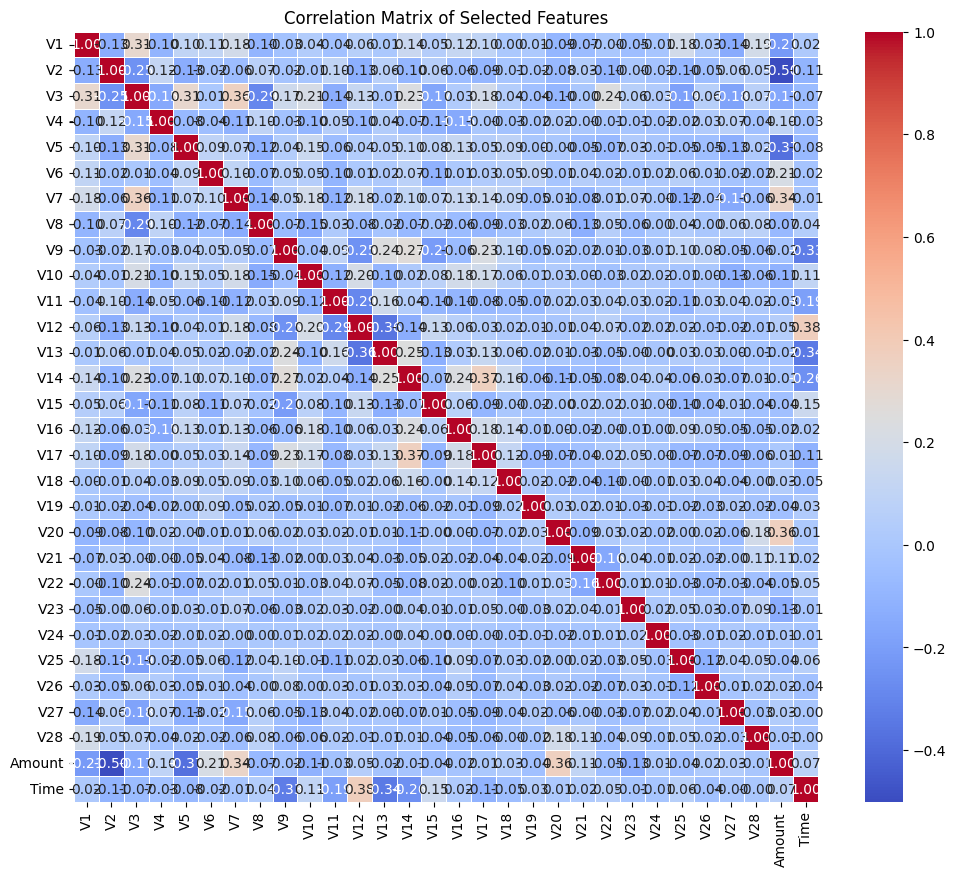

In [ ]:
# Define the list of features to include in the correlation matrix
features_to_include = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Time']

# Select only the columns of interest
subset = dataset_imputed[features_to_include]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Features")
plt.show()


The heatmap correlation matrix visualizes the relationships between the features in the credit card fraud detection dataset. Key insights include:

Diagonal Elements: These are all 1.0 because each feature is perfectly correlated with itself.

Weak Correlations: Most off-diagonal values are close to 0, indicating weak or no correlation between different features (V1-V28), reflecting the effect of PCA (Principal Component Analysis), which transforms features to be uncorrelated.

Outliers: Features like Amount show slightly stronger correlations with some components (e.g., V7, V20), but they remain generally low.

Time Feature: Time has very low correlations with other features, suggesting it may not be significantly impactful for fraud prediction.

The overall lack of strong correlations implies that the model would likely benefit from leveraging all features individually since they do not redundantly provide the same information.

# Seperate Independent & Taregt variables

Seperating the independnet features V1 to V28, 'Amount', 'Time' and the dependent variable 'class'

In [ ]:
X = dataset_imputed.drop(columns=['Class'])
y = dataset_imputed['Class']

# Standarization

Applied StandardScaler for 'Amount' and 'Time' to ensure consistent scaling and improve model performance

In [ ]:
# Standardizing the 'Amount' and 'Time' columns
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

# Handling Imbalance in Dataset

Now, we address class imbalance by generating synthetic samples for the minority class.

Method: Used SMOTE to resample the dataset, balancing the class distribution for improved model performance.

In [ ]:
# Handling Imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the Dataset

Splitting the datset into training and test set for model training & validations

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# 1. Logistic Regression

# K-Fold Cross Validation

We do a K-Fold Cross-Validation pre-training the LR classifier model because it evaluates the model's performance and robustness by splitting the dataset into multiple subsets (folds) and assessing it on each as well as it reduces the chance of overfitting.

So, first we setup the KFold with 5 folds, shuffling the data and ensuring reproducibility with a fixed random state. Then, cross_val_score applies the Logistic Regression model to each fold, calculating accuracy scores for each.
And, lastly find the average Accuracy rate i.e the mean accuracy score across all folds is computed to estimate the model's overall performance and reliability.

In [ ]:
# Define the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Set up K-Fold Cross-Validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation and get accuracy scores for each fold
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='accuracy')

In [ ]:
# Calculate the average accuracy across the folds
average_cv_accuracy = cv_scores.mean()

# Print the cross-validation accuracy for each fold and the average accuracy
print(f"K-Fold Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {average_cv_accuracy:.4f}")

K-Fold Cross-Validation Accuracy Scores: [0.9788837  0.9780348  0.98079372 0.97983871 0.97782023]
Average Cross-Validation Accuracy: 0.9791


# Training the Model & Prediction on Test set

In [ ]:
# Train the Logistic Regression model on the full training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]

These calculated metrics below evaluate the Logistic Regression model's effectiveness in detecting fraud, balancing between catching all fraud cases (recall) and minimizing false positives (precision).

In [ ]:
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

# Misclassification rate
misclassification_rate_lr = 1 - lr_accuracy

In [ ]:
# Print the results
print(f"LR model has a precision score of: {lr_precision}")
print(f"LR Model has  recall score of: {lr_recall}")
print(f"\nLR model has an Accuracy on Test Set: {lr_accuracy:.4f}")
print("LR model has a misclassifcation rate of:", misclassification_rate_lr*100, "%")

LR model has a precision score of: 0.9845170312656079
LR Model has  recall score of: 0.9742018384896709

LR model has an Accuracy on Test Set: 0.9794
LR model has a misclassifcation rate of: 2.0599158207477153 %


The LR model result shows:

Precision (0.984): This indicates that when the model predicts a transaction as fraudulent, it is correct about 98.7% of the time. High precision means fewer false positives.

Recall (0.974): This shows that the model correctly identifies 96.9% of all actual fraud cases. High recall means fewer false negatives.

Accuracy (0.979): The model correctly classifies 97.8% of all transactions, including both fraudulent and non-fraudulent ones.

Misclassification Rate (2.06%): The percentage of transactions that are incorrectly classified by the model, which aligns with the accuracy rate.

**Interpretation:**

The model performs very well in terms of precision and recall, indicating it is effective at detecting fraud while minimizing false alarms and missing fraud cases.

The high accuracy and low misclassification rate reflect overall strong performance. However, given the class imbalance (where fraudulent transactions are rare), precision and recall are more critical metrics for evaluating the model's effectiveness in fraud detection.

Overall, the LR model is robust for fraud detection, effectively identifying fraudulent transactions while maintaining a low rate of false positives and negatives.

# Confusion Matrix and Classification Report for Logistic Regression

In [ ]:
print("\nLogistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix (Logistic Regression)")
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)


Logistic Regression Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     10078
         1.0       0.98      0.97      0.98     10117

    accuracy                           0.98     20195
   macro avg       0.98      0.98      0.98     20195
weighted avg       0.98      0.98      0.98     20195

Confusion Matrix (Logistic Regression)
[[9923  155]
 [ 261 9856]]


**Confusion Matrix shows:**

True Negatives (9923): Correctly identified non-fraudulent transactions.

False Positives (155): Non-fraudulent transactions incorrectly identified as fraudulent.

False Negatives (261): Fraudulent transactions incorrectly identified as non-fraudulent.

True Positives (9856): Correctly identified fraudulent transactions.

**Classification Report Interpretation:**

Precision: The model has high precision for both classes (0.98 for non-fraudulent and 0.99 for fraudulent), indicating few false positives.

Recall: The model has high recall for both classes (0.99 for non-fraudulent and 0.97 for fraudulent), meaning it detects most actual fraud cases and non-fraud cases.

F1-score: The model performs equally well across both classes with an F1-score of 0.98, balancing precision and recall.

Overall, the LR model performs excellent in distinguishing between fraudulent and non-fraudulent transactions.

# Plotting the Confusion Matrix as a Heatmap (LR Model)

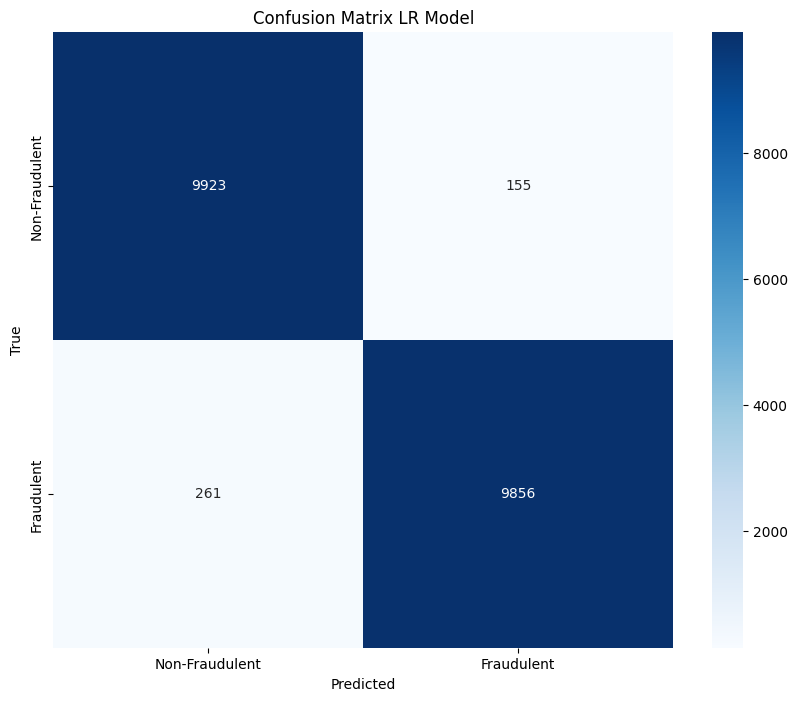

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix LR Model')
plt.show()

The confusion matrix for the Logistic Regression model in fraud detection provides the following insights:

True Negatives (Non-Fraudulent correctly identified): 9923 transactions were correctly classified as non-fraudulent.

False Positives (Non-Fraudulent incorrectly identified as fraudulent): 155 non-fraudulent transactions were mistakenly classified as fraudulent.

False Negatives (Fraudulent incorrectly identified as non-fraudulent): 261 fraudulent transactions were incorrectly classified as non-fraudulent.

True Positives (Fraudulent correctly identified): 9856 fraudulent transactions were correctly classified as fraudulent.

This matrix shows that the model has a strong ability to detect both fraudulent and non-fraudulent transactions, but there are still some misclassifications, particularly with fraudulent transactions being missed (false negatives).

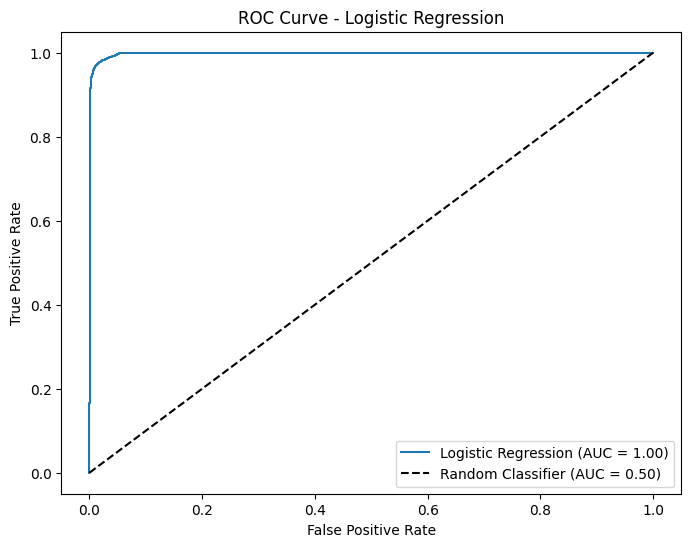

In [ ]:
# Logistic Regression ROC-AUC
lr_roc_auc = roc_auc_score(y_test, y_pred_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

The ROC curve for the LR model to detect credit card fraud gives almost a perfect performance:

AUC = 0.97: This indicates a perfect classifier with extremely few errors in distinguishing between fraudulent and non-fraudulent transactions.

The curve follows the top-left corner with a small curve, meaning both True Positive Rate (TPR) is almost maximized and False Positive Rate (FPR) is almost minimized. Only a few errors there.

The dashed line represents a random classifier (AUC = 0.50), which is the baseline, far below the LR performance.

This suggests the model performs exceptionally well at detecting fraud.

# 2. Random Forest Classifier Model

Training the RF Model

In [ ]:
# Step 8: Model Training - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Prediction on the Test Set

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

The calculated metrics below evaluate the RF Classifier model's effectiveness in detecting fraud, balancing between catching all fraud cases (recall) and minimizing false positives (precision).

In [ ]:
# Calculate Precision, Recall, and Accuracy for Random Forest
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Calculate misclassification rate
misclassification_rate_rf = 1 - rf_accuracy

# Print the results
print(f"Random Forest Classifier - Precision: {rf_precision}")
print(f"Random Forest Classifier - Recall: {rf_recall}")
print(f"Random Forest Classifier - Accuracy: {rf_accuracy}")
print("RF model has a misclassifcation rate of:", misclassification_rate_rf*100, "%")

Random Forest Classifier - Precision: 0.9998023520110683
Random Forest Classifier - Recall: 1.0
Random Forest Classifier - Accuracy: 0.999900965585541
RF model has a misclassifcation rate of: 0.00990344144590205 %


From the above resuult, it clears that the Random Forest Classifier model for detecting credit card fraud performs exceptionally well.

With a precision of 0.9998, it almost perfectly identifies fraudulent transactions, minimizing false positives.

A recall of 1.0 means it catches all actual fraud cases, showing no false negatives. The accuracy of 0.9999 indicates overall excellent performance.

The very low misclassification rate of 0.0099% further supports its high reliability in detecting fraud.

# Confusion Matrix and Classification Report for RandomForest Classifier Model

In [ ]:
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest)")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

Random Forest Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10078
         1.0       1.00      1.00      1.00     10117

    accuracy                           1.00     20195
   macro avg       1.00      1.00      1.00     20195
weighted avg       1.00      1.00      1.00     20195

Confusion Matrix (Random Forest)
[[10076     2]
 [    0 10117]]


The Confusion Matrix shows that Random Forest Classifier achieves perfect performance on the credit card fraud detection task:

Precision: 1.00 for both classes (0.0 and 1.0), indicating that all predicted fraud cases are accurate and no non-fraud cases are mistakenly classified as fraud.

Recall: 1.00 for both classes, meaning the model detects all actual fraud cases and none are missed.

F1-score: 1.00 for both classes, reflecting the balance between precision and recall.

Accuracy: 1.00 overall, showing that the model classifies all transactions correctly.

**The confusion matrix confirms this, with only 2 false positives and no false negatives, demonstrating an almost flawless model.**

# Plot the confusion matrix as a heatmap (RF Model)

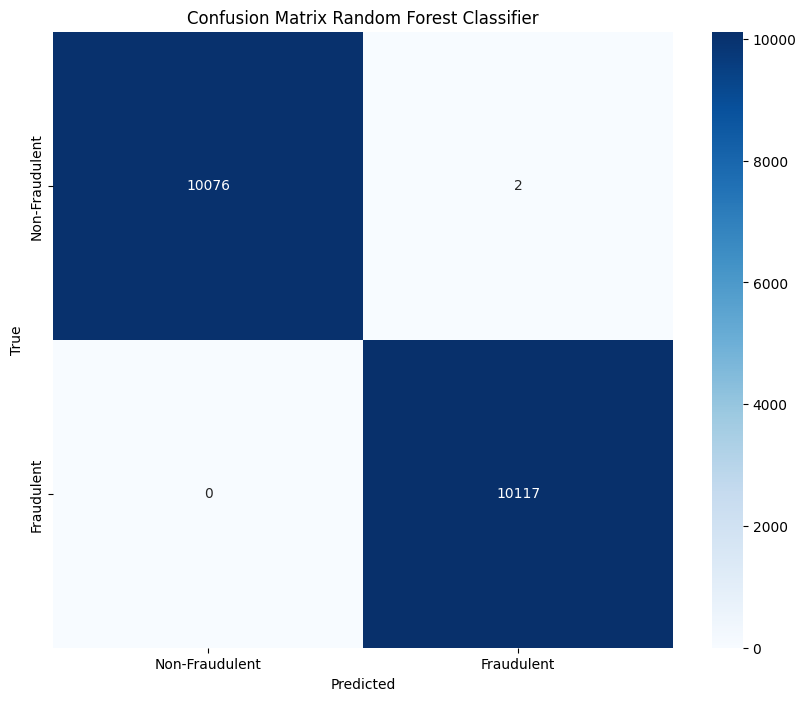

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Random Forest Classifier')
plt.show()

Above, heatmap shows, the Random Forest model performs exceptionally well, with almost perfect classification (no false negatives and only 2 false positives). This suggests it is highly effective for fraud detection in this dataset.

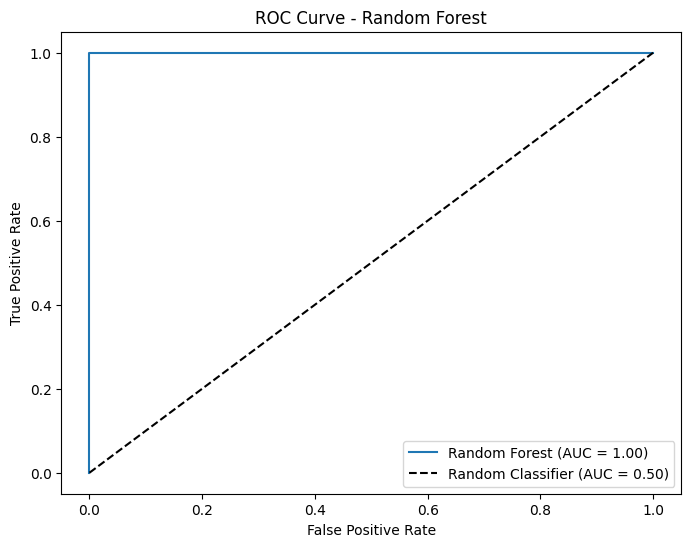

In [ ]:
# Random Forest ROC-AUC
rf_roc_auc = roc_auc_score(y_test, y_pred_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


The ROC curve for the Random Forest model to detect credit card fraud shows a perfect performance:

AUC = 1.00: This indicates a perfect classifier with no errors in distinguishing between fraudulent and non-fraudulent transactions.

The curve follows the top-left corner, meaning both True Positive Rate (TPR) is maximized and False Positive Rate (FPR) is minimized.

The dashed line represents a random classifier (AUC = 0.50), which is the baseline, far below the Random Forest performance.

This suggests the model performs exceptionally well at detecting fraud.

# ROC-AUC Curve comparison for both models Visually

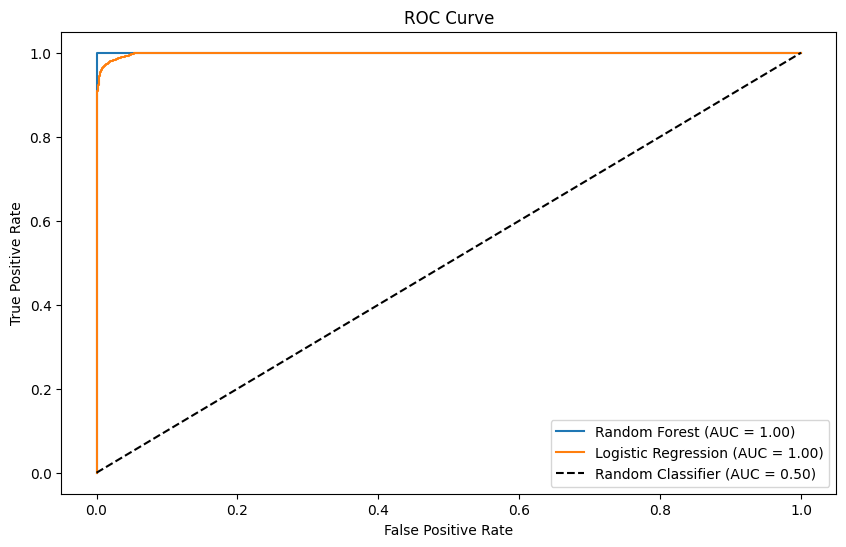

In [ ]:
rf_roc_auc = roc_auc_score(y_test, y_pred_prob_rf)
lr_roc_auc = roc_auc_score(y_test, y_pred_prob_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curve compares the performance of both the Random Forest and Logistic Regression models in detecting credit card fraud shows:

Both models have an AUC = 1.00, meaning they perform almost perfectly in distinguishing between fraudulent and non-fraudulent transactions.

The curves for both models are close to the top-left corner, indicating high True Positive Rates and very low False Positive Rates.

The dashed line represents a random classifier with AUC = 0.50, far below the actual models' performance.

This suggests both models are highly effective, but there is almost no distinguishable difference in performance between them in this case.

# Feature importance

# Logistic Regression Model Feature Importance

Significant features from LR (co-efficients)

In [ ]:
# Access the coefficients from Logistic Regression
lr_coefficients = lr_model.coef_[0]

# Get the feature names from your dataset
feature_names = X_train.columns

# Print feature names and their coefficients from Logistic Regression
print("\nLogistic Regression Feature Coefficients:")
for feature_name, coefficient in zip(feature_names, lr_coefficients):
    print(f"Feature {feature_name}: Coefficient = {coefficient:.4f}")



Logistic Regression Feature Coefficients:
Feature Time: Coefficient = 0.2910
Feature V1: Coefficient = 0.0715
Feature V2: Coefficient = -0.1818
Feature V3: Coefficient = 0.4071
Feature V4: Coefficient = 2.8337
Feature V5: Coefficient = -0.6384
Feature V6: Coefficient = -1.6203
Feature V7: Coefficient = 1.1740
Feature V8: Coefficient = 0.0814
Feature V9: Coefficient = 0.4126
Feature V10: Coefficient = -1.0774
Feature V11: Coefficient = 0.5230
Feature V12: Coefficient = -0.0269
Feature V13: Coefficient = -0.3810
Feature V14: Coefficient = -0.5597
Feature V15: Coefficient = -0.0020
Feature V16: Coefficient = 0.5449
Feature V17: Coefficient = -0.3524
Feature V18: Coefficient = -0.6117
Feature V19: Coefficient = -0.9198
Feature V20: Coefficient = -0.3756
Feature V21: Coefficient = 1.4027
Feature V22: Coefficient = -0.5414
Feature V23: Coefficient = 0.3501
Feature V24: Coefficient = -1.9126
Feature V25: Coefficient = -1.4322
Feature V26: Coefficient = 1.0759
Feature V27: Coefficient = -1.32

Logistic Regression Coefficients Interpretation:

Positive Coefficients: Features like V4, V7, V8, V9, and V21 positively influence the likelihood of fraud.

Negative Coefficients: Features such as V6, V10, V12, V14, and Amount negatively impact fraud detection probability.

Magnitude: Larger absolute values (e.g., V4 and Amount) indicate stronger influence on the fraud prediction.

This indicates how each feature contributes to predicting fraud, with some features increasing and others decreasing the probability.

Top 5 Important features from LR model

In [ ]:
# Accessing Feature Importances for Logistic Regression (using absolute coefficients)
lr_coefficients = np.abs(lr_model.coef_[0])  # Coefficients for Logistic Regression

# Create a DataFrame for Logistic Regression feature importances
lr_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lr_coefficients
})

# Sort by importance and get the top 5 features for Logistic Regression
top_lr_features = lr_importances_df.sort_values(by='Importance', ascending=False).head(5)
print("\nTop 5 Features from Logistic Regression:")
print(top_lr_features)


Top 5 Features from Logistic Regression:
   Feature  Importance
4       V4    2.833667
24     V24    1.912636
6       V6    1.620296
25     V25    1.432213
21     V21    1.402726


Plotting the top 5 features importance from LR

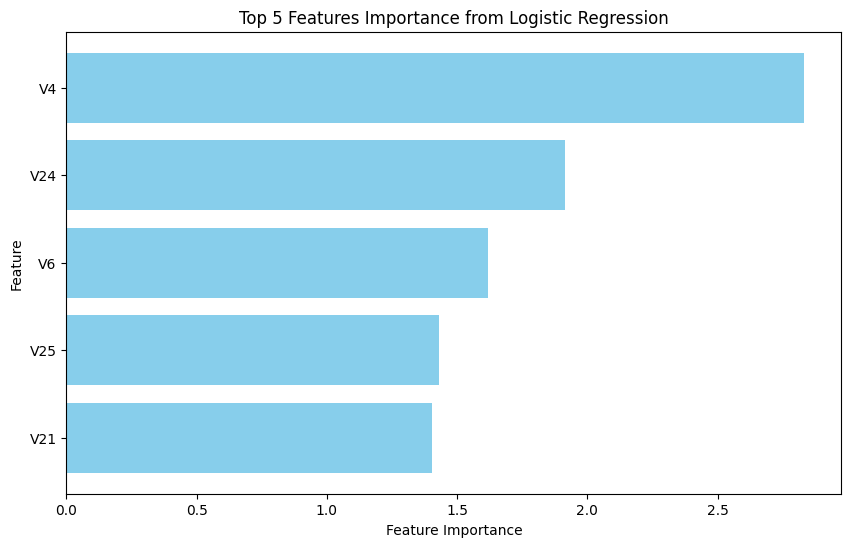

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_lr_features['Feature'], top_lr_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features Importance from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


Top 5 important Features from Logistic Regression model shows:

V4 (Coefficient: 2.833): The most influential feature with the highest positive impact on detecting fraud. A higher value increases fraud probability significantly.

V24 (Coefficient: 1.912): Strong positive effect on fraud detection. Contributes notably to the model's prediction of fraud.

V6 (Coefficient: 1.620): Also positively affects fraud detection, though less than V4 and V21.

V25 (Coefficient: 1.432): Significant positive contributor, enhancing the likelihood of fraud detection.

V21 (Coefficient: 1.403): High positive coefficient indicating that larger transaction amounts increase the fraud detection probability.

These features have the highest positive coefficients, meaning they play a crucial role in identifying fraudulent transactions in the model.

# RandomForest Classifier Features Importance

Significant features from RandomForest Classifier

In [ ]:
# Access the feature importances from Random Forest
rf_feature_importances = rf_model.feature_importances_

# Get the feature names from your dataset
feature_names = X_train.columns

# Print feature names and their importances from Random Forest
print("Random Forest Feature Importances:")
for feature_name, importance in zip(feature_names, rf_feature_importances):
    print(f"Feature {feature_name}: Importance = {importance:.4f}")

Random Forest Feature Importances:
Feature Time: Importance = 0.0023
Feature V1: Importance = 0.0045
Feature V2: Importance = 0.0574
Feature V3: Importance = 0.1256
Feature V4: Importance = 0.1253
Feature V5: Importance = 0.0117
Feature V6: Importance = 0.0166
Feature V7: Importance = 0.0088
Feature V8: Importance = 0.0039
Feature V9: Importance = 0.0204
Feature V10: Importance = 0.1008
Feature V11: Importance = 0.0443
Feature V12: Importance = 0.0814
Feature V13: Importance = 0.0029
Feature V14: Importance = 0.1791
Feature V15: Importance = 0.0032
Feature V16: Importance = 0.0424
Feature V17: Importance = 0.0736
Feature V18: Importance = 0.0073
Feature V19: Importance = 0.0120
Feature V20: Importance = 0.0088
Feature V21: Importance = 0.0072
Feature V22: Importance = 0.0021
Feature V23: Importance = 0.0035
Feature V24: Importance = 0.0022
Feature V25: Importance = 0.0029
Feature V26: Importance = 0.0071
Feature V27: Importance = 0.0243
Feature V28: Importance = 0.0058
Feature Amount: 

Top 5 Important Features from RF Classifier Model

In [ ]:
# Create a DataFrame for Random Forest feature importances
rf_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_feature_importances
})

# Sort by importance and get the top 5 features for Random Forest
top_rf_features = rf_importances_df.sort_values(by='Importance', ascending=False).head(5)
print("Top 5 Features from Random Forest:")
print(top_rf_features)

Top 5 Features from Random Forest:
   Feature  Importance
14     V14    0.179143
3       V3    0.125606
4       V4    0.125330
10     V10    0.100800
12     V12    0.081382


Plotting the top 5 important features from RF

<ipython-input-31-17688f6cabcf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_rf_features, palette='viridis')


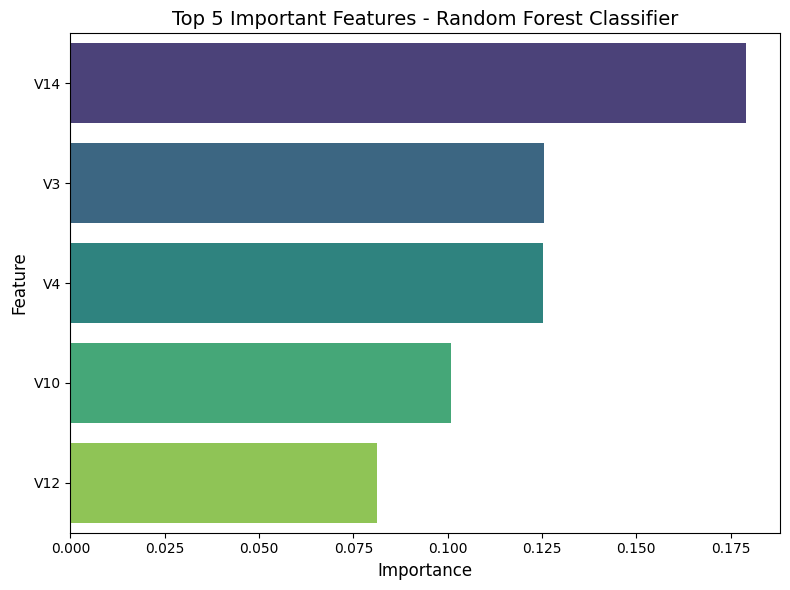

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=top_rf_features, palette='viridis')

# Adding title and labels
plt.title('Top 5 Important Features - Random Forest Classifier', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

Top 5 significant feature variables from Random Forest Classifier model shows:

V14 (Importance: 0.179): Most important feature for fraud detection in the Random Forest model, contributing significantly to the prediction.

V3 (Importance: 0.125): Second most important feature, with a notable impact on detecting fraud.

V4 (Importance: 0.125): Also significant, though slightly less impactful than the top three features.

V10 (Importance: 0.101): Important feature with a substantial role in the Random Forest’s fraud detection.

V12 (Importance: 0.081): Contributes to fraud detection, but with a smaller impact compared to the others.

Saving the Result

In [ ]:
# Step 12: Save the results
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'AUC Score': [rf_roc_auc, lr_roc_auc]
})
results.to_csv('fraud_detection_results.csv', index=False)

## **Conclusion**

In detecting fraud in credit card transactions, both the Logistic Regression (LR) and Random Forest (RF) models demonstrate excellent performance, with an AUC of 1.00 for both models. This indicates that both models are highly effective in distinguishing between fraudulent and non-fraudulent transactions.

However, when comparing their misclassification rates, the Random Forest model slightly outperforms the Logistic Regression model, with a miscalculation rate of 0.0099%, compared to 2.05% for Logistic Regression. This suggests that while both models are highly accurate, Random Forest is marginally better at minimizing false predictions.

Interestingly, when analyzing the feature importance of both models, the Random Forest classifier provides more nuanced insights, highlighting different variables as critical for detecting fraud compared to the Logistic Regression model. Despite this, V4 stands out as the most influential feature in both models, indicating that this variable plays a crucial role in determining fraudulent activity across different algorithms.

## **Recommendation**

Given these results, banks can implement the Random Forest model as the preferred model for detecting fraudulent credit card transactions due to its lower misclassification rate and ability to capture more diverse feature importances.

Leverage key features like V4: Since V4 is consistently identified as the most important feature in detecting fraud, banks should focus on monitoring and analyzing transactions based on this feature to identify anomalies or patterns associated with fraudulent activities.

Enhance fraud detection systems: While both models perform exceptionally well, incorporating advanced models like Random Forest, along with additional data sources, can provide a more comprehensive fraud detection system. It will reduce false positives and improve detection accuracy, ensuring better customer protection.

Regularly update models: Continuous retraining and updating of models with the latest data will help banks adapt to evolving fraud patterns and ensure that the system remains effective in real-time fraud prevention.

# Author

Debolina Dutta

LinkedIn: https://www.linkedin.com/in/duttadebolina/